In [2]:
from astropy.io import fits
import os
from sklearn import preprocessing
import shutil
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize
from scipy.interpolate import CubicSpline
from scipy.integrate import simps
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter
import scipy.signal as signal
from astropy.time import Time
import pandas as pd
from lmfit import Model
from PyAstronomy.pyasl import foldAt
from scipy.optimize import curve_fit
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from scipy.ndimage.filters import uniform_filter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import lightkurve as lk
from pylab import rc
from matplotlib import gridspec
from matplotlib import transforms
from matplotlib import colors
from scipy.stats import gaussian_kde
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
from scipy.optimize import leastsq

In [11]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

def foldMethod(timeArray, period):
    phases = []
    for el in timeArray:
        phase = el/period - int(el/period)
        phases.append(phase)
    return np.array(phases)

In [16]:
timeZTF1[1]/0.02

timeZTF1[1]/0.02 - int(timeZTF1[1]/0.02)

0.20833499962463975

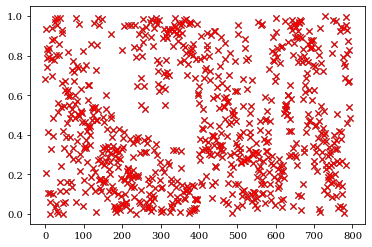

In [12]:
plt.plot(foldMeth(timeZTF1,period=0.02), 'kx')
plt.plot(foldMeth2(timeZTF1,period=0.02), 'rx')

486
470
12.453445344534453
838
794
12.453545354535454
486
470
838
794


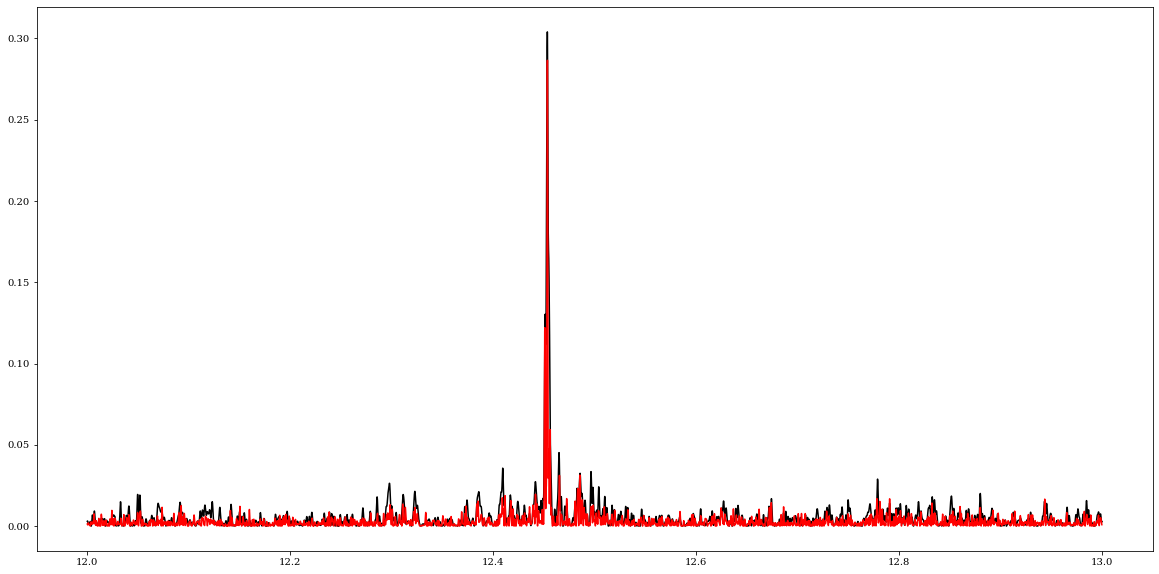

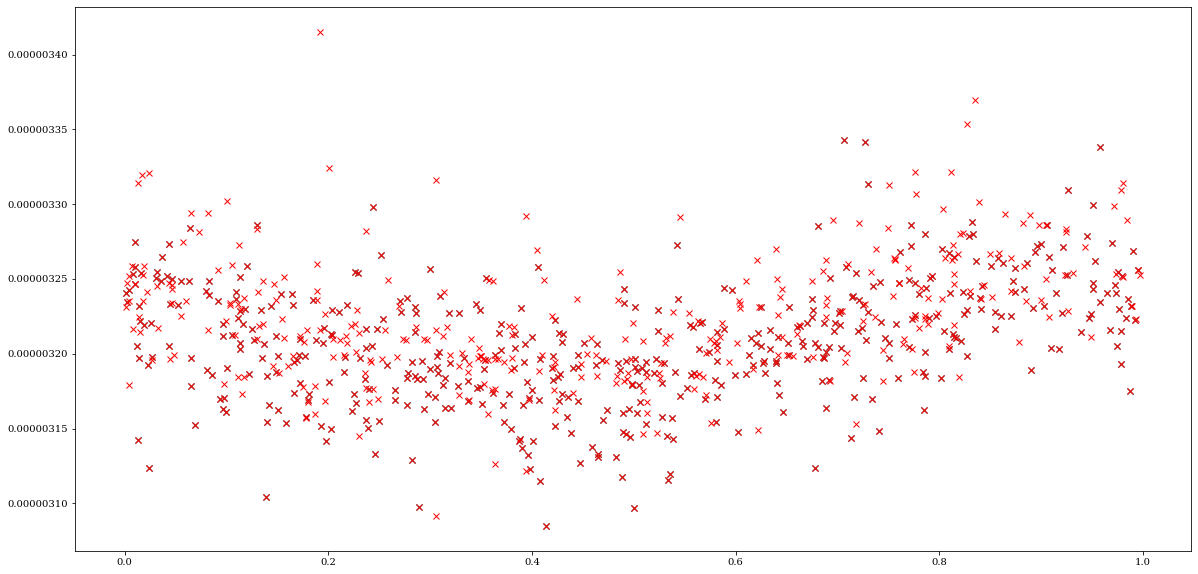

In [4]:
data1 = pd.read_csv('bestPeriod/gd356ztfdr3.csv', delimiter=',')
print(len(data1))
data1 = data1[data1["catflags"] < 1]
print(len(data1))
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
freq = np.linspace(12,13,10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])




data1 = pd.read_csv('bestPeriod/gd356ztfdr5.csv', delimiter=',')
print(len(data1))
data1 = data1[data1["catflags"] < 1]
print(len(data1))
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
freq = np.linspace(12,13,10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl,c='r')
print(freq[np.argmax(powerPl)])





data1 = pd.read_csv('bestPeriod/gd356ztfdr3.csv', delimiter=',')
print(len(data1))
data1 = data1[data1["catflags"] < 1]
print(len(data1))
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
#fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
plt.figure(figsize=(20,10))
timeZTF1 = timeZTF1.to_numpy()
fluxZTF1 = fluxZTF1.to_numpy()
#plt.plot([12.45,12.45], [0,max(powerPl)])
ZTFPhase = foldMeth(timeZTF1, 1/12.453545354535454)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF1S = fluxZTF1[sortIndi]
plt.plot(ZTFPhaseSorted,fluxZTF1S, 'kx')




data1 = pd.read_csv('bestPeriod/gd356ztfdr5.csv', delimiter=',')
print(len(data1))
data1 = data1[data1["catflags"] < 1]
print(len(data1))
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
#fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
timeZTF1 = timeZTF1.to_numpy()
fluxZTF1 = fluxZTF1.to_numpy()
ZTFPhase = foldMeth(timeZTF1, 1/12.453545354535454)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF1S = fluxZTF1[sortIndi]
plt.plot(ZTFPhaseSorted,fluxZTF1S, 'rx')


In [ ]:
12.453545354535454

In [17]:
timeZTF1[408]-2457000

1397.6009990000166

In [9]:
timeZTF1

0      58203.39359
1      58203.40417
2      58204.37873
3      58204.41487
4      58204.45578
          ...     
789    59219.53752
790    59221.49340
791    59227.47654
792    59229.55083
793    59231.44969
Name: mjd, Length: 794, dtype: float64

794
794
5.222597892884373e-05 7.880423156558791e-05 9.676027436911205e-05
15.1550293 15.147465700000001 15.128555300000002


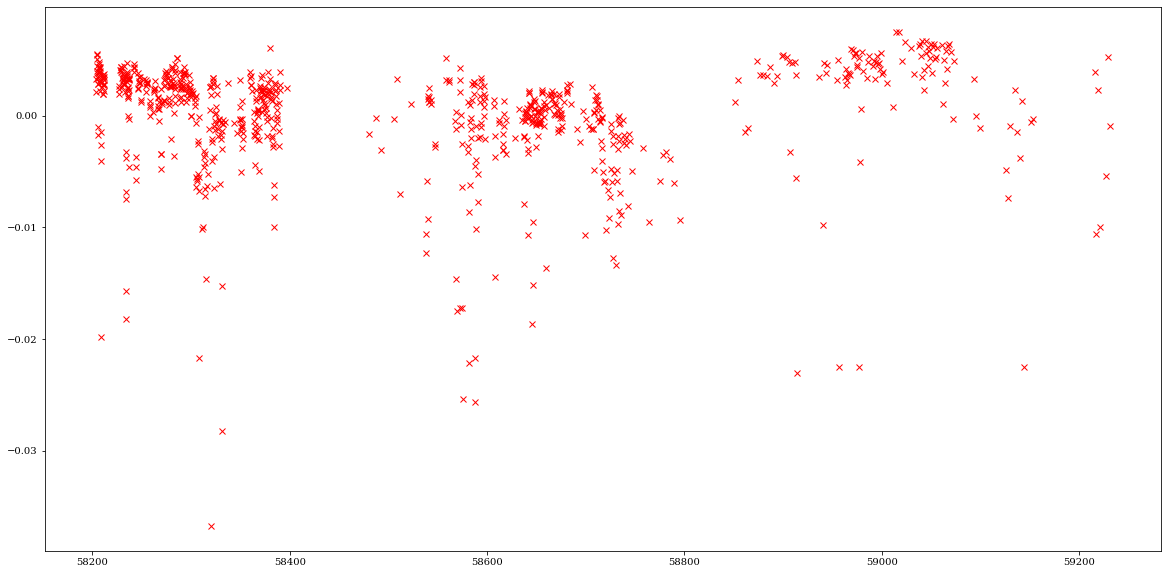

In [7]:
data1 = pd.read_csv('bestPeriod/ZTFDR4.csv', delimiter=',')
print(len(data1))
data1 = data1[data1["catflags"] < 1]
print(len(data1))
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1


plt.figure(figsize=(20,10))
plt.plot(timeZTF1, fluxZTF1/0.0243095, 'rx')
#plt.plot(timeZTF1, fluxZTF1Old*1000, 'kx')
print(fluxZTF1[0],fluxZTF1[1],fluxZTF1[2])
print(fluxZTF1Old[0],fluxZTF1Old[1],fluxZTF1Old[2])
dat = np.vstack((timeZTF1, fluxZTF1))
dat = dat.T
np.savetxt('bestPeriod/ZTFGreenDR4.dat', dat, delimiter = '\t')
#plt.xlim(timeZTF1[0],timeZTF1[10])


dat = np.vstack((timeZTF1[:409], fluxZTF1[:409]))
dat = dat.T
np.savetxt('bestPeriod/ZTFGreenPart1DR4.dat', dat, delimiter = '\t')

dat = np.vstack((timeZTF1[409:], fluxZTF1[409:]))
dat = dat.T
np.savetxt('bestPeriod/ZTFGreenPart2DR4.dat', dat, delimiter = '\t')

In [4]:
np.mean(timeZTF1)

2458468.6111283908

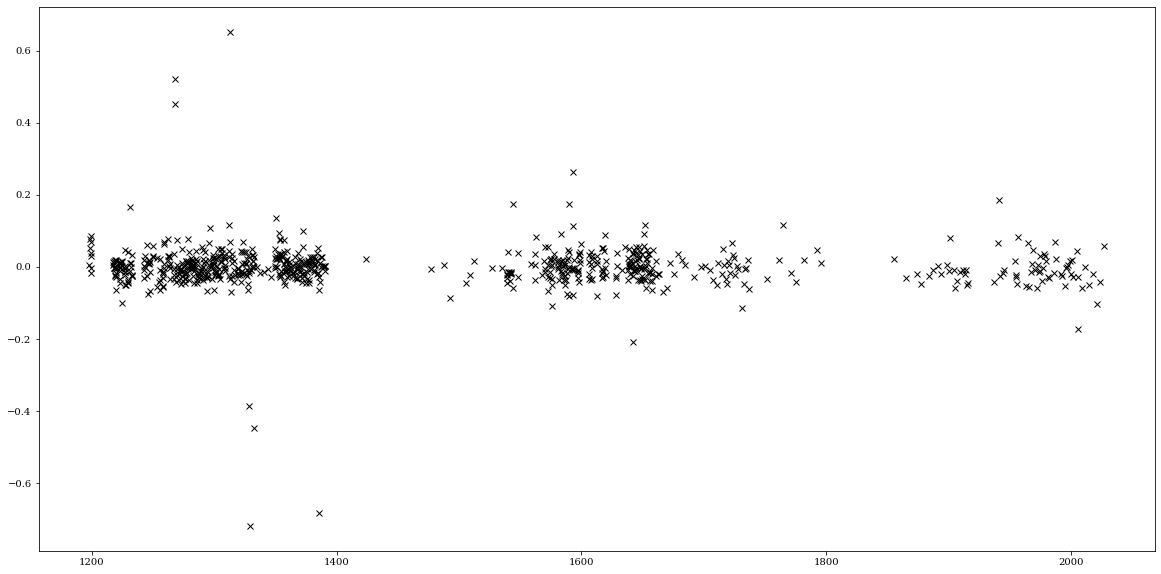

In [41]:
data2 = pd.read_csv('GD356ZTF/2.csv', delimiter=',')
timeZTF2 = data2['mjd']
fluxZTF2 = data2['mag']


timeZTF2 = timeZTF2-2457000
#fluxZTF2 = 1000/(10**((fluxZTF2+26.74)/2.5))
fluxZTF2 = (10**((fluxZTF2)))
fluxZTF2 = (fluxZTF2/np.mean(fluxZTF2))-1
plt.figure(figsize=(20,10))
plt.plot(timeZTF2, fluxZTF2, 'kx')

dat = np.vstack((timeZTF2, fluxZTF2))
dat = dat.T
np.savetxt('bestPeriod/ZTFRed.dat', dat, delimiter = '\t')

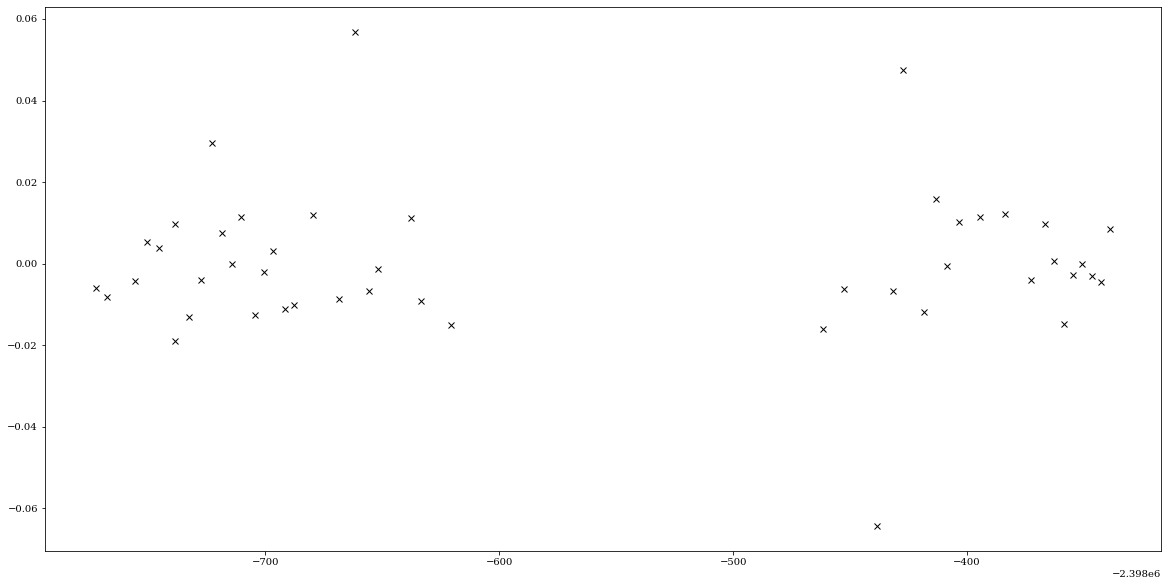

In [8]:
data3 = pd.read_csv('GD356ZTF/3.csv', delimiter=',')
timeZTF3 = data3['mjd']
fluxZTF3 = data3['mag']


timeZTF3 = timeZTF3-2457000
fluxZTF3 = 1000/(10**((fluxZTF3+26.74)/2.5))
fluxZTF3 = (fluxZTF3/np.mean(fluxZTF3))-1
plt.figure(figsize=(20,10))
plt.plot(timeZTF3, fluxZTF3, 'kx')

dat = np.vstack((timeZTF3, fluxZTF3))
dat = dat.T
np.savetxt('bestPeriod/ZTFI.dat', dat, delimiter = '\t')

In [17]:
dat = np.vstack((timeZTF1+2457000, fluxZTF1/0.0107968171))
dat = dat.T
np.savetxt('bestPeriod/ZTFFinal.dat', dat, delimiter = '\t')

In [8]:
from scipy.optimize import leastsq
def sineFitLevenbergMarquardtZTF(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 10000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return 0.0107968171*np.sin(time*(2*np.pi/0.08029870152418028)+phase)
        x0 = 0
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestPhases.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.0107968171)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD


def sineFitZTF(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 1000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        minMSE = 9999999  
        for phase in phases:
            model = 0.0107968171*np.sin(chunksT[i]*(2*np.pi/0.08029870152418028)+phase)
            mse = mean_squared_error(model, chunksF[i])
            if mse < minMSE:
                minMSE = mse
                bestFitPhase = phase
        bestPhases.append(bestFitPhase)
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.0107968171)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD





def sineFitLevenbergMarquardtZTFAmp(time, flux, Nslices):
    bestAmps = []
    timeMean = []
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, thisamp):
            return thisamp*np.sin(time*(2*np.pi/0.08029870152418028)+1.5031844728888097)
        x0 = 0.0107968171
        def residuals(thisamp, flux, time):
            return flux - model(time, thisamp)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestAmps.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        
    return bestAmps, timeMean



def sineFitGen(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 100000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        minMSE = 9999999  
        for phase in phases:
            model = 0.983356953*np.sin(chunksT[i]*(2*np.pi*12.45359653596536)+phase)
            mse = mean_squared_error(model, chunksF[i])
            if mse < minMSE:
                minMSE = mse
                bestFitPhase = phase
        bestPhases.append(bestFitPhase)
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.983356953)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD



def sineFitLevenbergMarquardtGen(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 100000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return 0.983356953*np.sin(time*(2*np.pi*12.45359653596536)+phase)
        x0 = 0
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestPhases.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.983356953)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD

y-val 2.7334078945735287
y-err 2.097934232430948
x pos [1471.2196350335164]


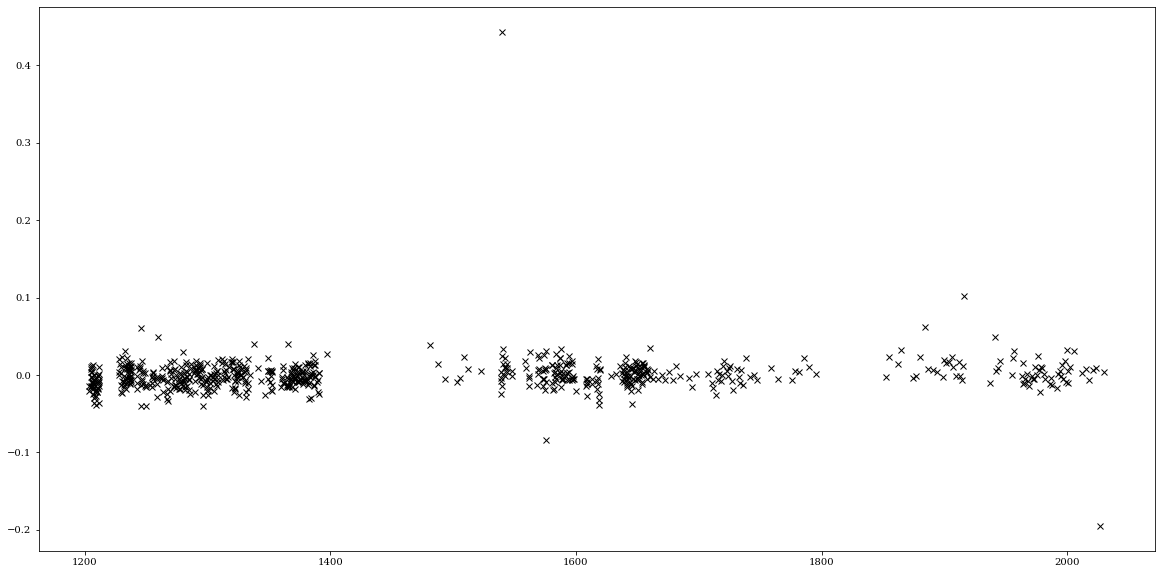

In [15]:
alltmps,timeAvg,allerrors = sineFitLevenbergMarquardtZTF(timeZTF1, fluxZTF1,1)

toplot = 0.08029870*24*60*(alltmps[0]-1.5031844728888097)/(2*np.pi)
print('y-val', toplot)
print('y-err', 0.08029870*24*60*(allerrors[0])/(2*np.pi))
print('x pos', timeAvg)
start = timeZTF1[0]-2457000
end = timeZTF1[715]-2457000
times = np.linspace(start,end ,100000)
model = 0.0107968171*np.sin(times*(2*np.pi/0.08029870152418028)+1.5031844728888097)
plt.figure(figsize=(20,10))
plt.plot(timeZTF1, fluxZTF1, 'kx')
#plt.plot(times,model)
#plt.ylim(-0.005,0.005)
#plt.xlim(1205,1210)

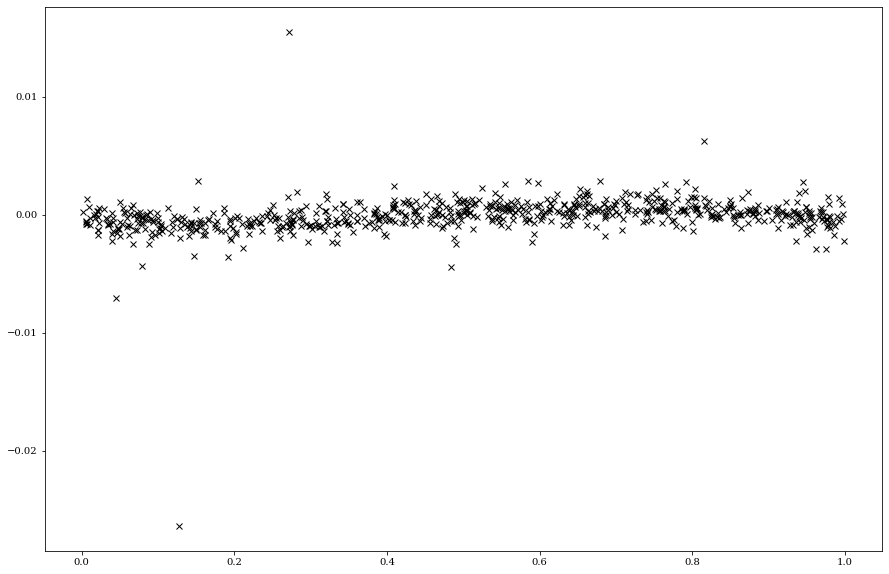

In [6]:
ZTFPhase = foldMeth(timeZTF1, 1/12.4536101)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF1S = fluxZTF1[sortIndi]


#model = 0.00619304762*np.sin(TessPhasesMean*(2*np.pi*12.453593)/12.453593+0.134084) + 1

plt.figure(figsize=(15,10))

plt.plot(ZTFPhaseSorted,fluxZTF1S,'kx')
#plt.plot(TessPhasesMean,model)
#plt.ylim(15.1,15.2)
#plt.savefig('TESSFolded.pdf')

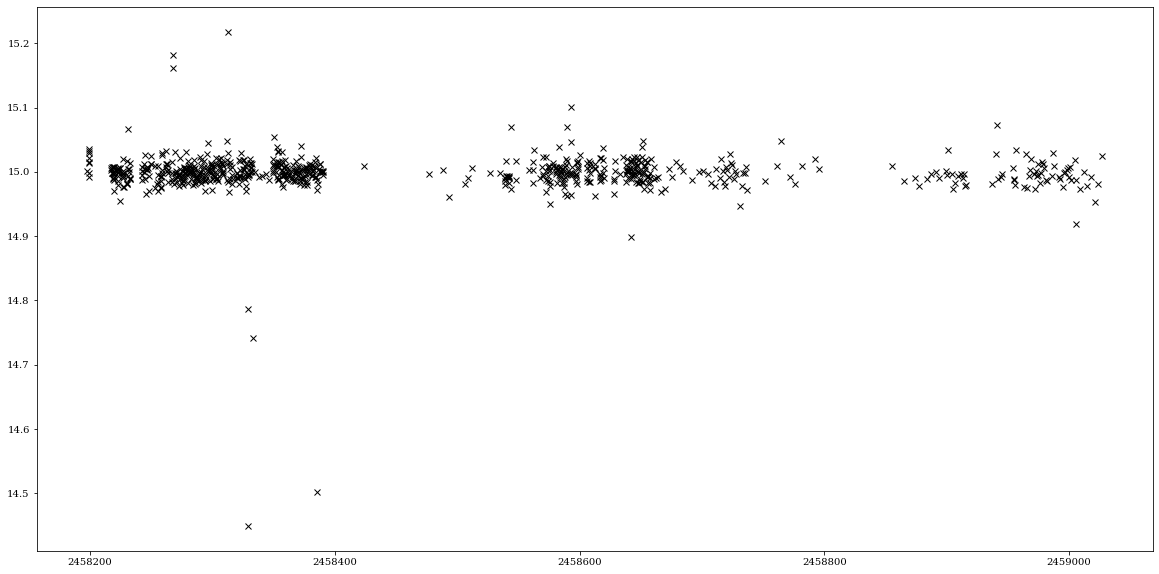

In [37]:
data2 = pd.read_csv('GD356ZTF/2.csv', delimiter=',')
timeZTF2 = data2['mjd']
fluxZTF2 = data2['mag']
plt.figure(figsize=(20,10))
plt.plot(timeZTF2, fluxZTF2, 'kx')
dat = np.vstack((timeZTF2, fluxZTF2))
dat = dat.T
np.savetxt('bestPeriod/ZTF2amp.dat', dat, delimiter = '\t')
#plt.ylim(15.1,15.2)

(14.95, 15.05)

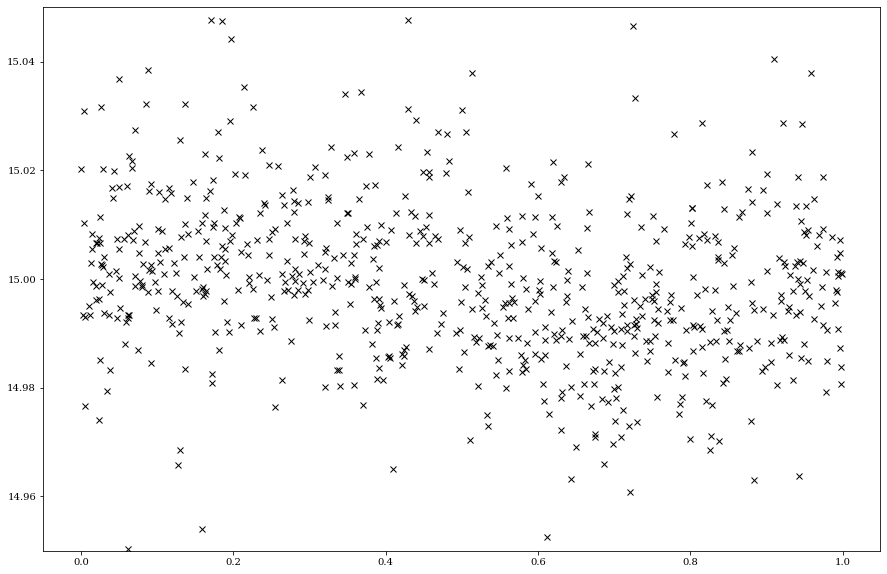

In [15]:
ZTFPhase = foldMeth(timeZTF2, 1/12.4536101)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF2S = fluxZTF2[sortIndi]


#model = 0.00619304762*np.sin(TessPhasesMean*(2*np.pi*12.453593)/12.453593+0.134084) + 1

plt.figure(figsize=(15,10))

plt.plot(ZTFPhaseSorted,fluxZTF2S,'kx')
#plt.plot(TessPhasesMean,model)
plt.ylim(14.95,15.05)
#plt.savefig('TESSFolded.pdf')

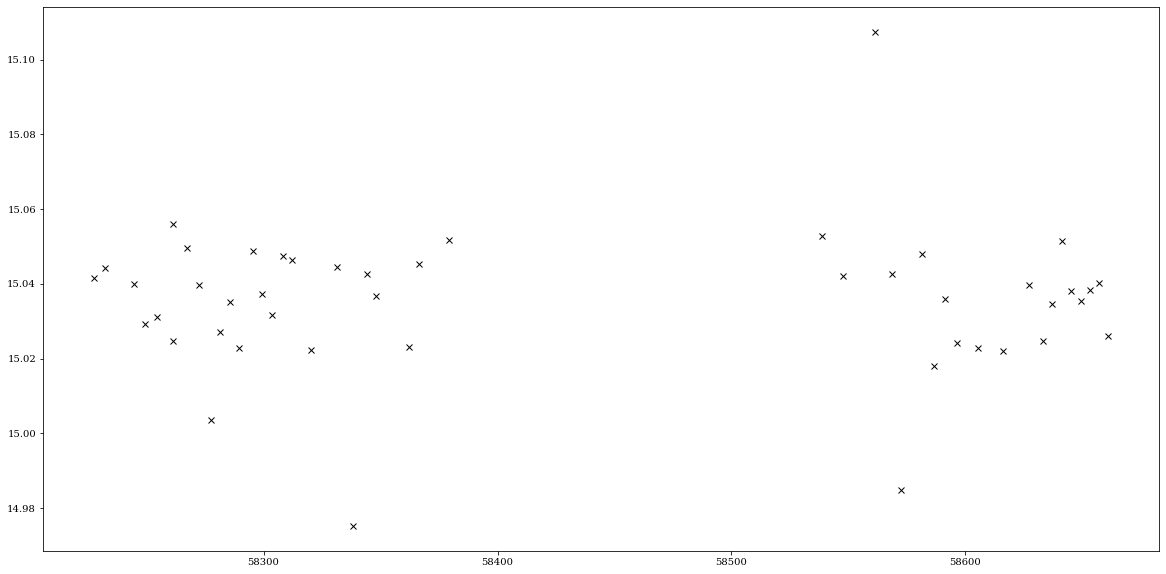

In [16]:
data3 = pd.read_csv('GD356ZTF/3.csv', delimiter=',')
timeZTF3 = data3['mjd']
fluxZTF3 = data3['mag']
plt.figure(figsize=(20,10))
plt.plot(timeZTF3, fluxZTF3, 'kx')
#plt.ylim(15.1,15.2)

(14.95, 15.1)

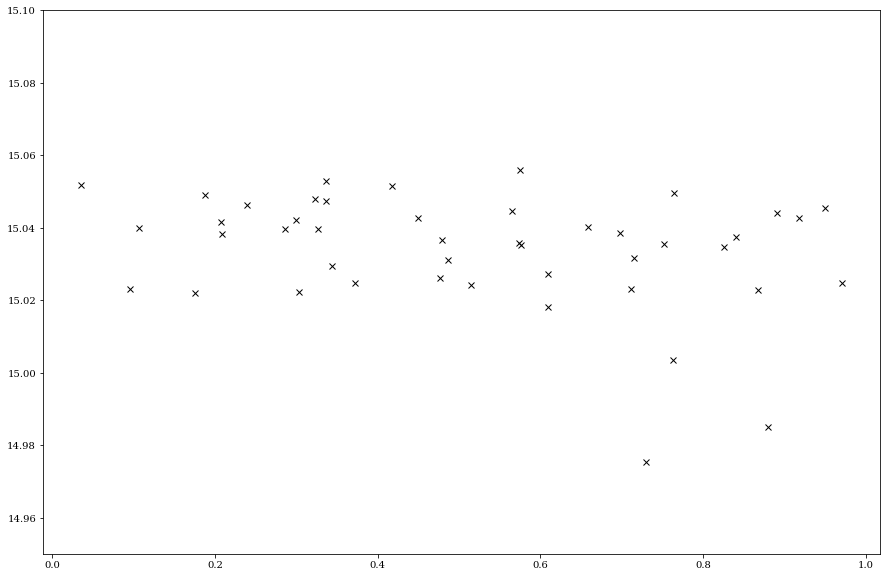

In [18]:
ZTFPhase = foldMeth(timeZTF3, 1/12.4536101)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF3S = fluxZTF3[sortIndi]


#model = 0.00619304762*np.sin(TessPhasesMean*(2*np.pi*12.453593)/12.453593+0.134084) + 1

plt.figure(figsize=(15,10))

plt.plot(ZTFPhaseSorted,fluxZTF3S,'kx')
#plt.plot(TessPhasesMean,model)
plt.ylim(14.95,15.1)
#plt.savefig('TESSFolded.pdf')

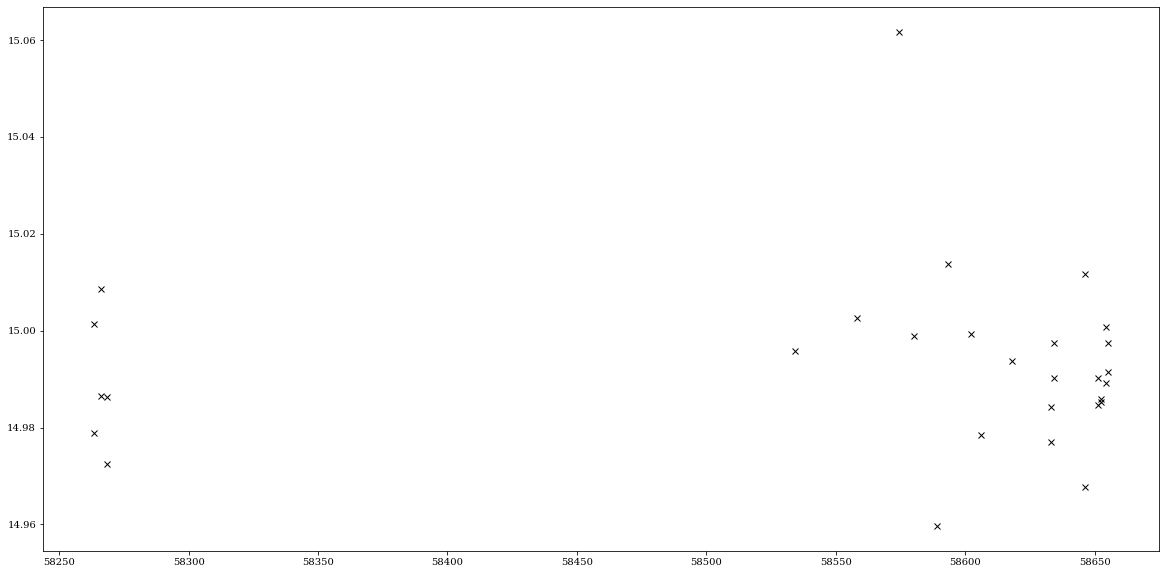

In [19]:
data4 = pd.read_csv('GD356ZTF/4.csv', delimiter=',')
timeZTF4 = data4['mjd']
fluxZTF4 = data4['mag']
plt.figure(figsize=(20,10))
plt.plot(timeZTF4, fluxZTF4, 'kx')
#plt.ylim(15.1,15.2)

(14.95, 15.1)

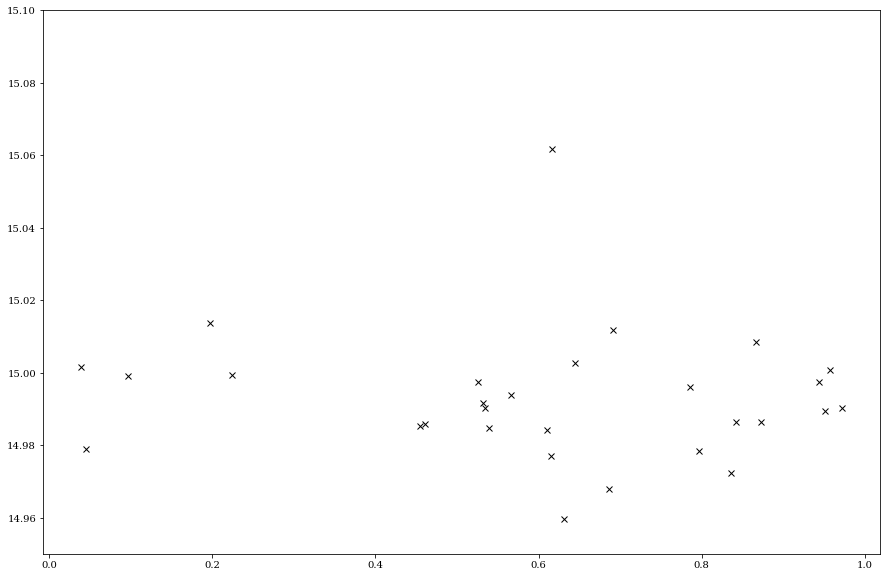

In [20]:
ZTFPhase = foldMeth(timeZTF4, 1/12.4536101)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF4S = fluxZTF4[sortIndi]


#model = 0.00619304762*np.sin(TessPhasesMean*(2*np.pi*12.453593)/12.453593+0.134084) + 1

plt.figure(figsize=(15,10))

plt.plot(ZTFPhaseSorted,fluxZTF4S,'kx')
#plt.plot(TessPhasesMean,model)
plt.ylim(14.95,15.1)
#plt.savefig('TESSFolded.pdf')

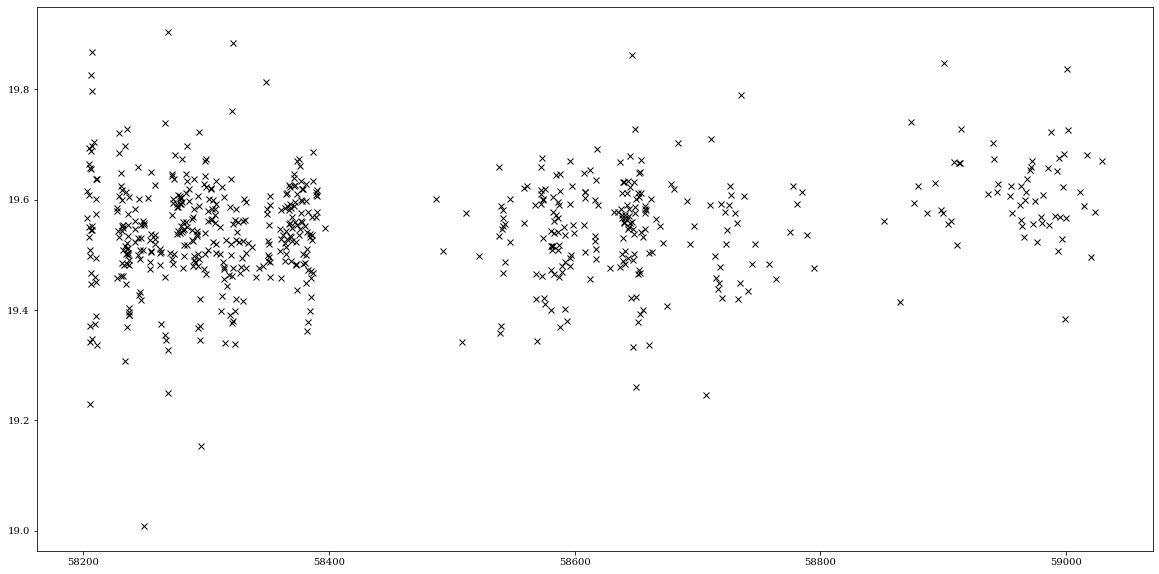

In [3]:
data5 = pd.read_csv('GD356ZTF/5c.csv', delimiter=',')
timeZTF5 = data5['mjd']
fluxZTF5 = data5['mag']
plt.figure(figsize=(20,10))
plt.plot(timeZTF5, fluxZTF5, 'kx')

dat = np.vstack((timeZTF5, fluxZTF5))
dat = dat.T
np.savetxt('GD356ZTF/5.dat', dat, delimiter = '\t')
#plt.ylim(15.1,15.2)

(19.2, 19.8)

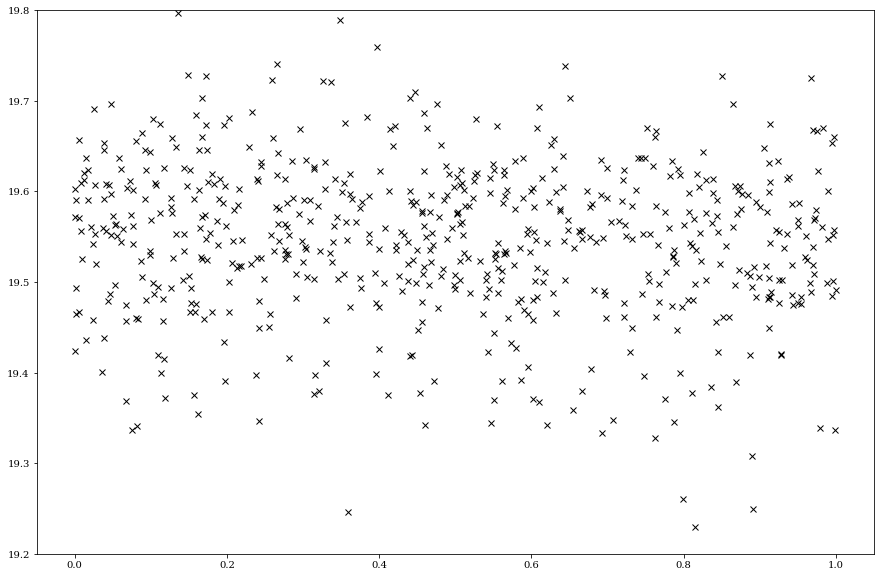

In [26]:
ZTFPhase = foldMeth(timeZTF5, 1/12.4536101)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF5S = fluxZTF5[sortIndi]


#model = 0.00619304762*np.sin(TessPhasesMean*(2*np.pi*12.453593)/12.453593+0.134084) + 1

plt.figure(figsize=(15,10))

plt.plot(ZTFPhaseSorted,fluxZTF5S,'kx')
#plt.plot(TessPhasesMean,model)
plt.ylim(19.2,19.8)
#plt.savefig('TESSFolded.pdf')

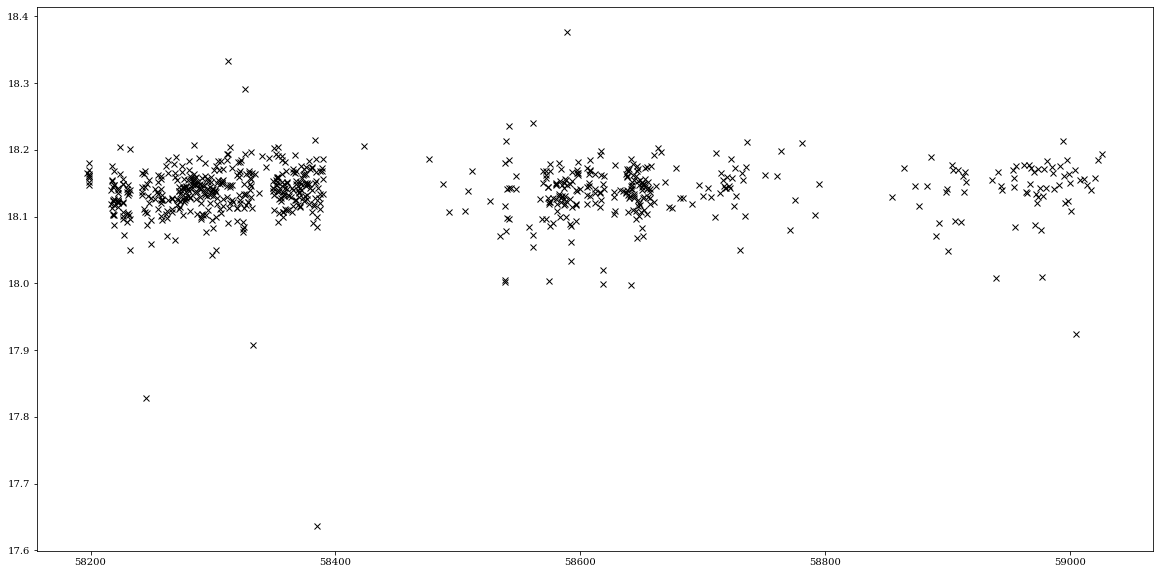

In [27]:
data6 = pd.read_csv('GD356ZTF/6c.csv', delimiter=',')
timeZTF6 = data6['mjd']
fluxZTF6 = data6['mag']
plt.figure(figsize=(20,10))
plt.plot(timeZTF6, fluxZTF6, 'kx')
#plt.ylim(15.1,15.2)

(18, 18.3)

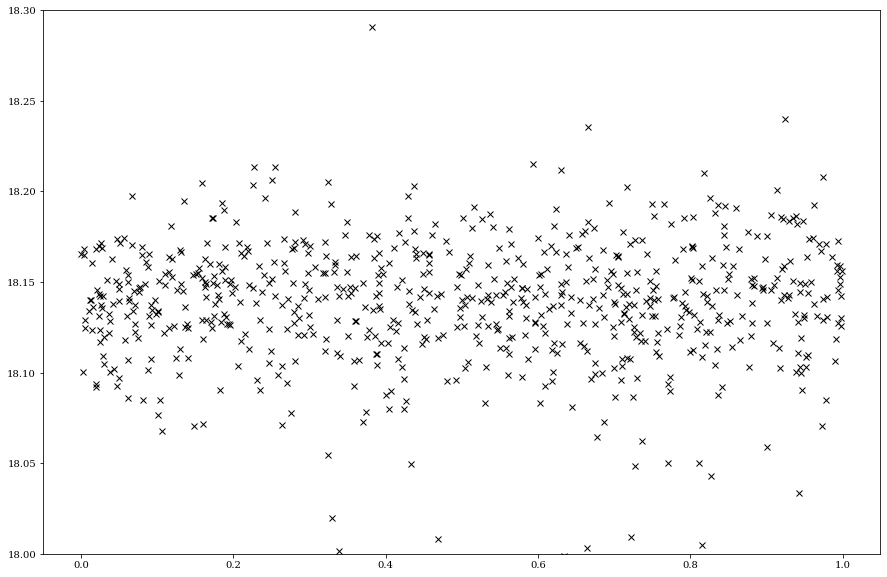

In [30]:
ZTFPhase = foldMeth(timeZTF6, 1/12.4536101)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF6S = fluxZTF6[sortIndi]


#model = 0.00619304762*np.sin(TessPhasesMean*(2*np.pi*12.453593)/12.453593+0.134084) + 1

plt.figure(figsize=(15,10))

plt.plot(ZTFPhaseSorted,fluxZTF6S,'kx')
#plt.plot(TessPhasesMean,model)
plt.ylim(18,18.3)
#plt.savefig('TESSFolded.pdf')

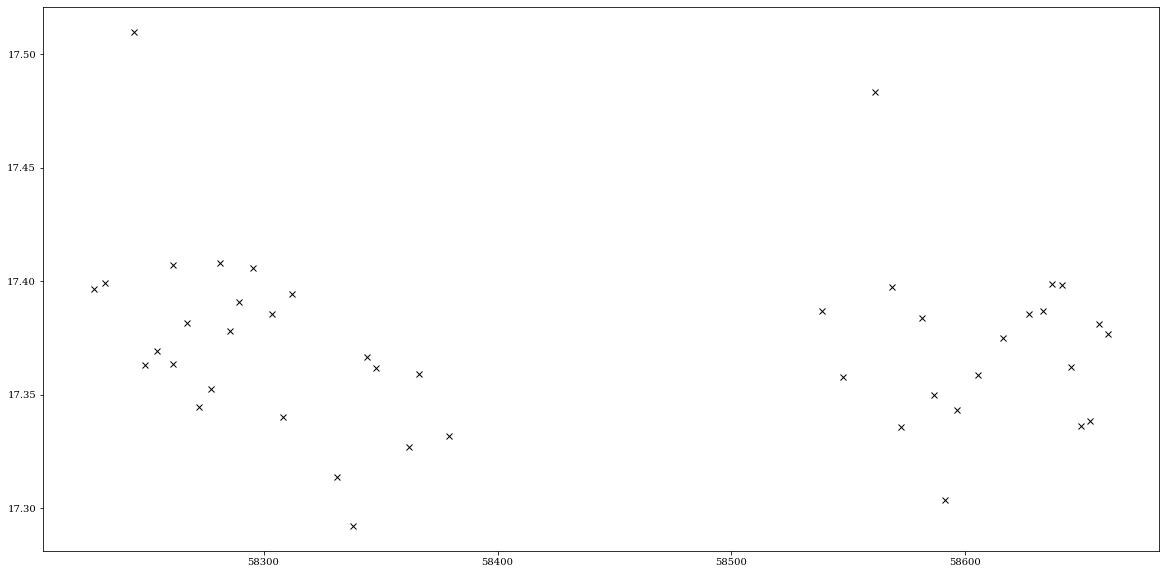

In [31]:
data7 = pd.read_csv('GD356ZTF/7c.csv', delimiter=',')
timeZTF7 = data7['mjd']
fluxZTF7 = data7['mag']
plt.figure(figsize=(20,10))
plt.plot(timeZTF7, fluxZTF7, 'kx')
#plt.ylim(15.1,15.2)

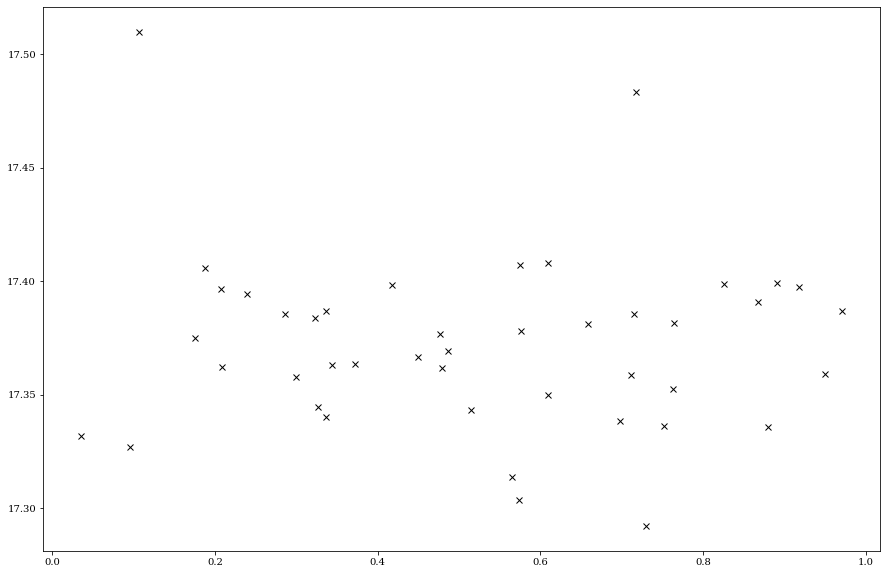

In [33]:
ZTFPhase = foldMeth(timeZTF7, 1/12.4536101)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF7S = fluxZTF7[sortIndi]


#model = 0.00619304762*np.sin(TessPhasesMean*(2*np.pi*12.453593)/12.453593+0.134084) + 1

plt.figure(figsize=(15,10))

plt.plot(ZTFPhaseSorted,fluxZTF7S,'kx')
#plt.plot(TessPhasesMean,model)
#plt.ylim(18,18.3)
#plt.savefig('TESSFolded.pdf')

In [38]:
1/0.08029867

12.453506390579072

1.0049004900490048
gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!
12.452445244524451


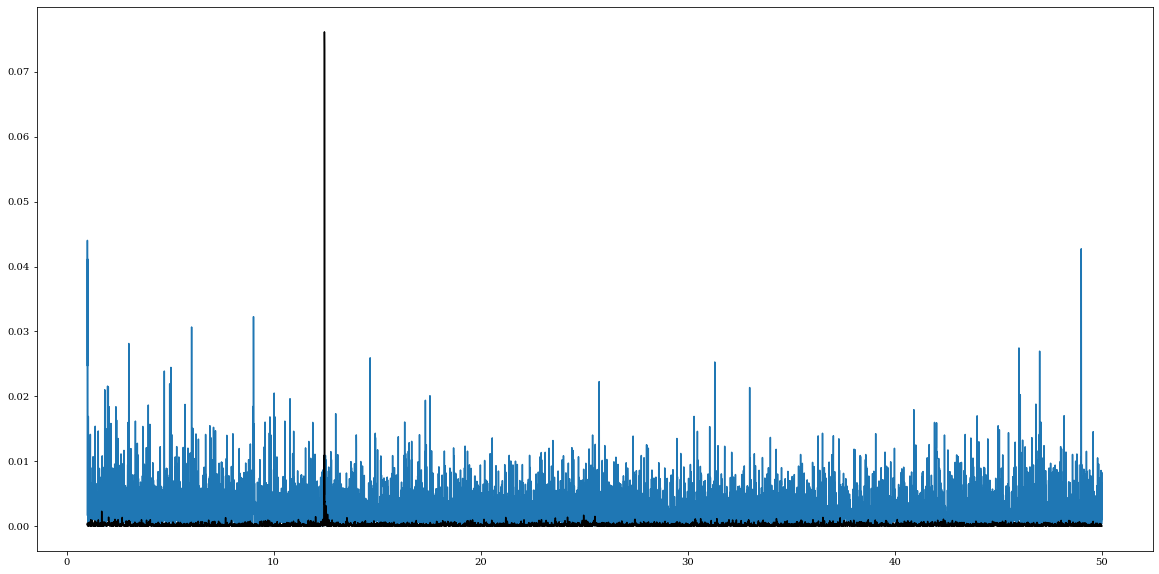

In [10]:
freq = np.linspace(1,50,10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])


lc = lk.search_lightcurvefile('GD356', sector=16).download().PDCSAP_FLUX.remove_nans()
sec16 = lc.flux
sec16t = lc.time
sec16e = lc.flux_err
lc = lk.search_lightcurvefile('GD356', sector=23).download().PDCSAP_FLUX.remove_nans()
sec23 = lc.flux
sec23t = lc.time
sec23e = lc.flux_err

lc = lk.search_lightcurvefile('GD356', sector=24).download().PDCSAP_FLUX.remove_nans()
sec24 = lc.flux
sec24t = lc.time
sec24e = lc.flux_err

lc = lk.search_lightcurvefile('GD356', sector=25).download().PDCSAP_FLUX.remove_nans()
sec25 = lc.flux
sec25t = lc.time
sec25e = lc.flux_err

lc = lk.search_lightcurvefile('GD356', sector=26).download().PDCSAP_FLUX.remove_nans()
sec26 = lc.flux
sec26t = lc.time
sec26e = lc.flux_err



sec16e = sec16e/np.mean(sec16)
sec23e = sec23e/np.mean(sec23)
sec24e = sec24e/np.mean(sec24)
sec25e = sec25e/np.mean(sec25)
sec26e = sec26e/np.mean(sec26)
sec16 = (sec16/np.mean(sec16))-1
sec23 = (sec23/np.mean(sec23))-1
sec24 = (sec24/np.mean(sec24))-1
sec25 = (sec25/np.mean(sec25))-1
sec26 = (sec26/np.mean(sec26))-1

sec16t = sec16t + 2457000
sec23t = sec23t + 2457000
sec24t = sec24t + 2457000
sec25t = sec25t + 2457000
sec26t = sec26t + 2457000

TESSStackPhot = np.append(sec16, sec23)
TESSStackPhot = np.append(TESSStackPhot, sec24)
TESSStackPhot = np.append(TESSStackPhot, sec25)
TESSStackPhot = np.append(TESSStackPhot, sec26)
TESSStackTime = np.append(sec16t, sec23t)
TESSStackTime = np.append(TESSStackTime, sec24t)
TESSStackTime = np.append(TESSStackTime, sec25t)
TESSStackTime = np.append(TESSStackTime, sec26t)
TESSStackErr = np.append(sec16e, sec23e)
TESSStackErr = np.append(TESSStackErr, sec24e)
TESSStackErr = np.append(TESSStackErr, sec25e)
TESSStackErr = np.append(TESSStackErr, sec26e)


#model = 0.00619304762*np.sin(TESSStackTime*(2*np.pi*12.453593)+0.134084) + 1
#noise = np.mean(np.abs(TESSStackPhot-model))
#print(1/noise) # <= TESS SNR


powerPl = LombScargle(TESSStackTime,TESSStackPhot).power(freq)
plt.plot(freq,powerPl*6.7, c='k')
print(freq[np.argmax(powerPl)])

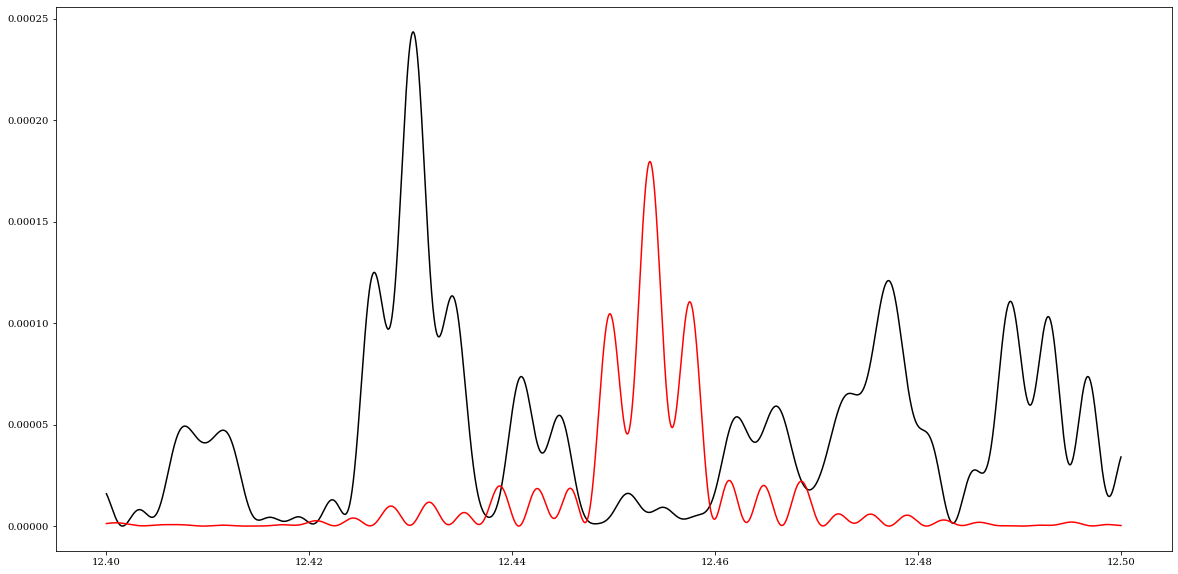

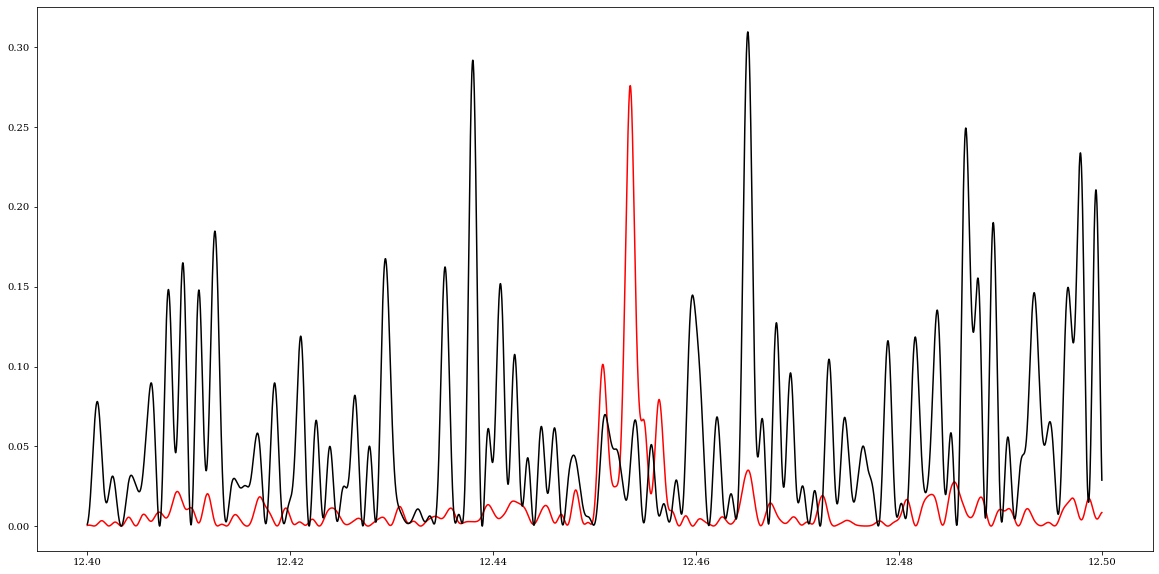

In [16]:
plt.figure(figsize=(20,10))
constants = np.ones_like(TESSStackTime)
powerPl = LombScargle(TESSStackTime,constants,center_data=False).power(freq)
plt.plot(freq,powerPl*30, c='k')
powerPl = LombScargle(TESSStackTime,TESSStackPhot).power(freq)
plt.plot(freq,powerPl*0.01, c='r')

plt.figure(figsize=(20,10))
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.plot(freq,powerPl,c='r')
constants = np.ones_like(fluxZTF1)
powerPl = LombScargle(timeZTF1,constants).power(freq)
plt.plot(freq,powerPl*30,c='k')

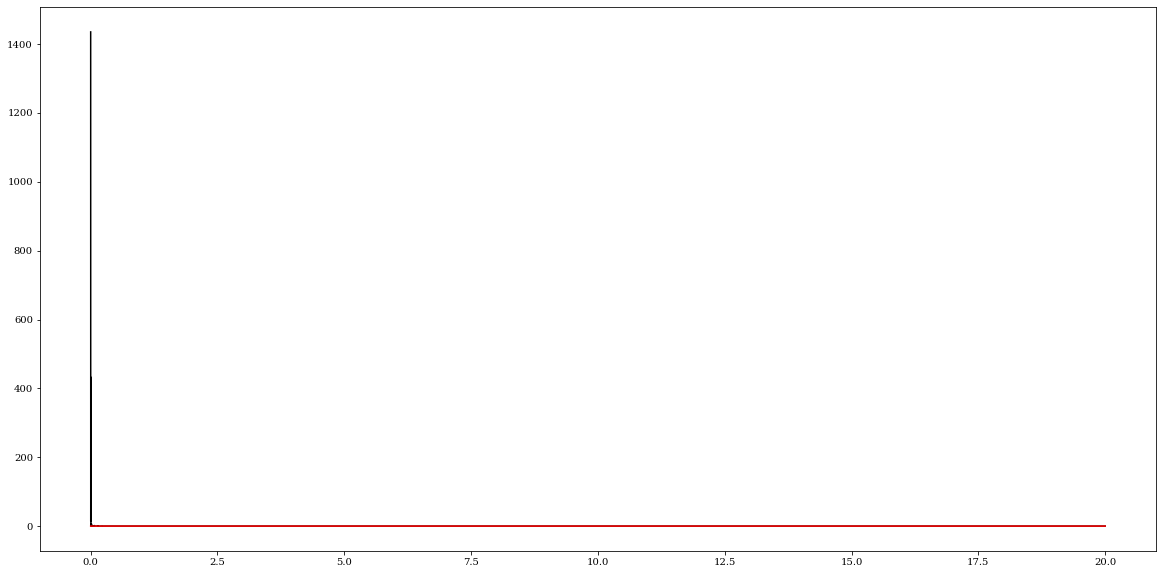

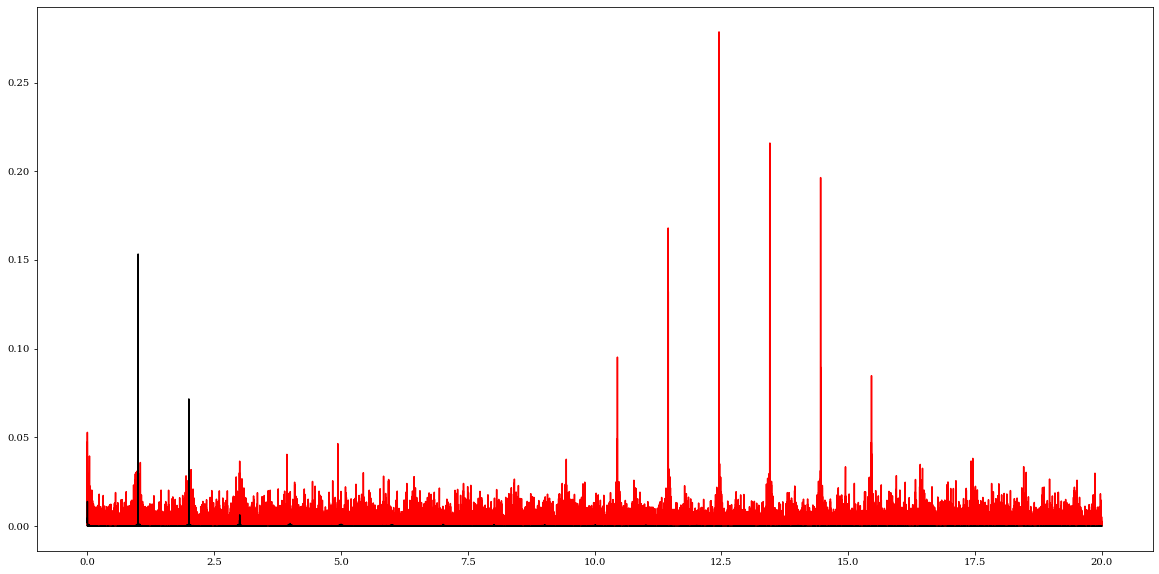

In [20]:
freq = np.linspace(0.001,20,100000)
plt.figure(figsize=(20,10))
constants = np.ones_like(TESSStackTime)
powerPl = LombScargle(TESSStackTime,constants,center_data=False).power(freq)
plt.plot(freq,powerPl*30, c='k')
powerPl = LombScargle(TESSStackTime,TESSStackPhot).power(freq)
plt.plot(freq,powerPl*0.01, c='r')

plt.figure(figsize=(20,10))
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.plot(freq,powerPl,c='r')
constants = np.ones_like(fluxZTF1)
powerPl = LombScargle(timeZTF1,constants).power(freq)
plt.plot(freq,powerPl*0.01,c='k')

12.44992199219922
12.453552355235523


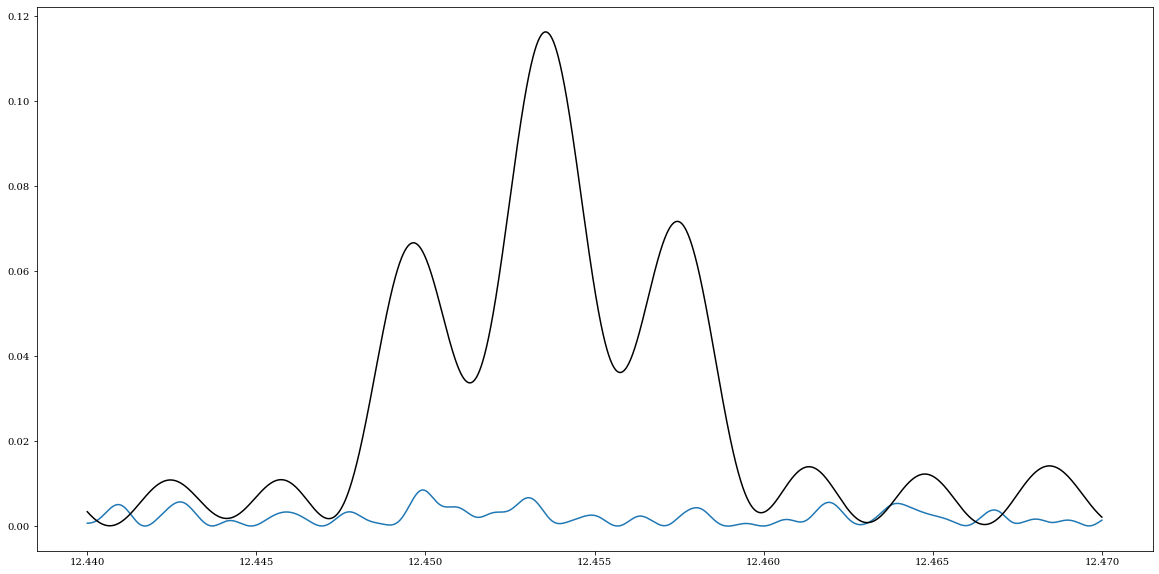

In [11]:
freq = np.linspace(12.44,12.47,10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])
powerPl = LombScargle(TESSStackTime,TESSStackPhot).power(freq)
plt.plot(freq,powerPl*6.5, c='k')
print(freq[np.argmax(powerPl)])

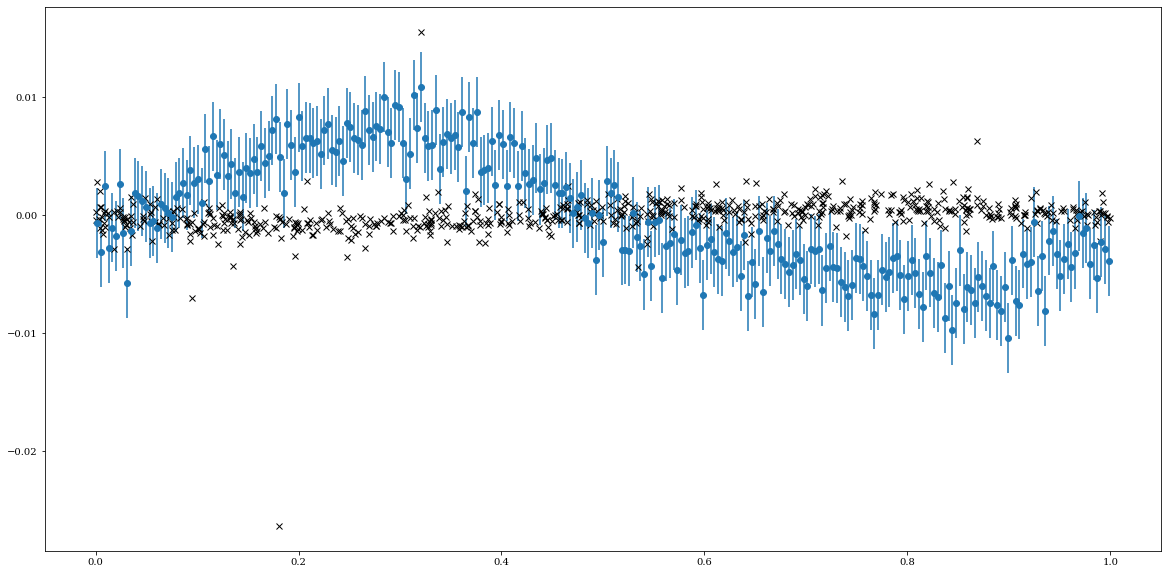

In [57]:
phasesTessAll = foldMeth(TESSStackTime,1/12.453600360036004)
sortIndi = np.argsort(phasesTessAll)
phasesTessAll = phasesTessAll[sortIndi]
TESSStackPhotSorted = TESSStackPhot[sortIndi]
TESSStackErrSorted = TESSStackErr[sortIndi]
TessModelSorted = TessModel[sortIndi]
meanFluxT = np.nanmean(np.pad(TESSStackPhotSorted.astype(float), (0, 300 - TESSStackPhotSorted.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
meanPhaseT = np.nanmean(np.pad(phasesTessAll.astype(float), (0, 300 - phasesTessAll.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
meanErrT = np.nanmean(np.pad(TESSStackErrSorted.astype(float), (0, 300 - TESSStackErrSorted.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
TessModelSortedMean = np.nanmean(np.pad(TessModelSorted.astype(float), (0, 300 - TessModelSorted.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
meanErrT = meanErrT/np.sqrt(300)
plt.figure(figsize=(20,10))
plt.errorbar(meanPhaseT,meanFluxT,yerr=meanErrT,marker='o',ls='')

ZTFPhase = foldMeth(timeZTF1,1/12.453600360036004)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF1S = fluxZTF1[sortIndi]
fluxZTF1S = (fluxZTF1S/np.mean(fluxZTF1S))-1
plt.plot(ZTFPhaseSorted, fluxZTF1S, 'kx')

(-0.01, 0.01)

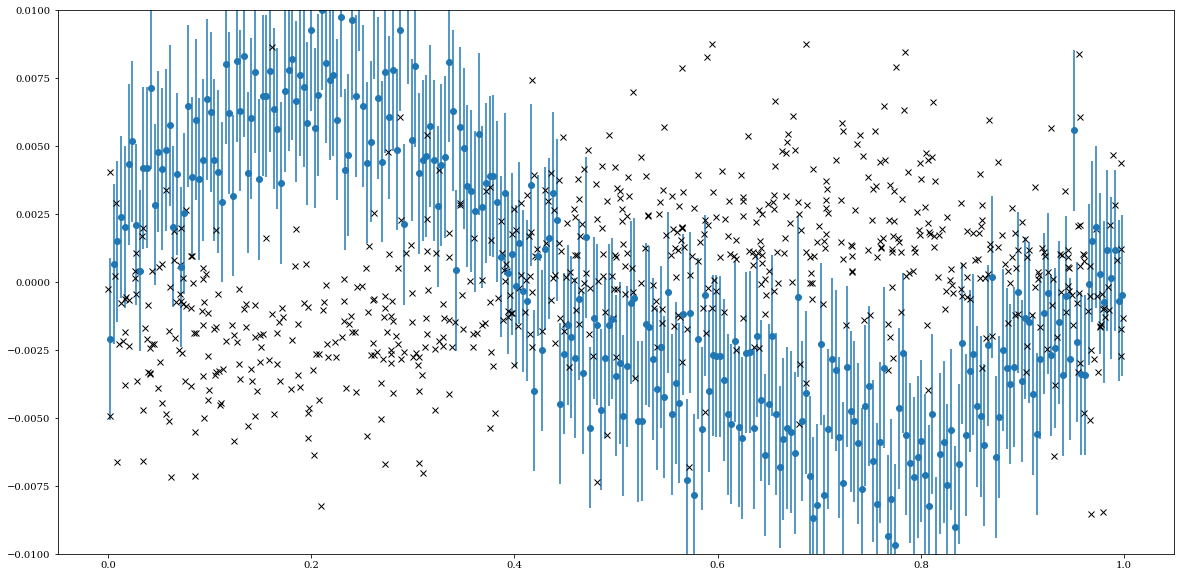

In [61]:
phasesTessAll = foldMeth(TESSStackTime,1/12.453565356535654)
sortIndi = np.argsort(phasesTessAll)
phasesTessAll = phasesTessAll[sortIndi]
TESSStackPhotSorted = TESSStackPhot[sortIndi]
TESSStackErrSorted = TESSStackErr[sortIndi]
TessModelSorted = TessModel[sortIndi]
meanFluxT = np.nanmean(np.pad(TESSStackPhotSorted.astype(float), (0, 300 - TESSStackPhotSorted.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
meanPhaseT = np.nanmean(np.pad(phasesTessAll.astype(float), (0, 300 - phasesTessAll.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
meanErrT = np.nanmean(np.pad(TESSStackErrSorted.astype(float), (0, 300 - TESSStackErrSorted.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
TessModelSortedMean = np.nanmean(np.pad(TessModelSorted.astype(float), (0, 300 - TessModelSorted.size%300), mode='constant', constant_values=np.NaN).reshape(-1, 300), axis=1)
meanErrT = meanErrT/np.sqrt(300)
plt.figure(figsize=(20,10))
plt.errorbar(meanPhaseT,meanFluxT,yerr=meanErrT,marker='o',ls='')

ZTFPhase = foldMeth(timeZTF1,1/12.453565356535654)
sortIndi = np.argsort(ZTFPhase)
ZTFPhaseSorted = ZTFPhase[sortIndi]
fluxZTF1S = fluxZTF1[sortIndi]
fluxZTF1S = (fluxZTF1S/np.mean(fluxZTF1S))-1
plt.plot(ZTFPhaseSorted, fluxZTF1S*3, 'kx')
plt.ylim(-0.01,0.01)

In [25]:
1/12.4535695

0.08029826308031604

4724


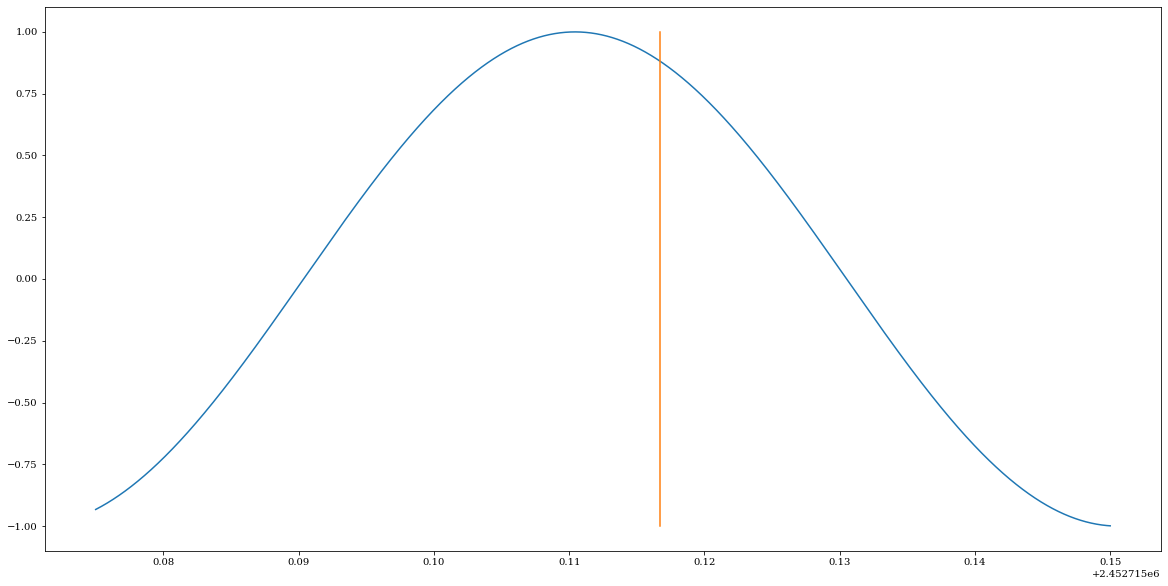

In [3]:
points = np.linspace(2452715.075,2452715.15, 10000)
#tess 12.4536286  0.516192
ultimateModel = np.sin((points)*(2*np.pi*12.4535123)+0.453787*2*np.pi)
#12.4535695 0.864452
plt.figure(figsize=(20,10))
plt.plot(points, ultimateModel)
plt.plot([2452715.116695,2452715.116695], [-1,1])
print(np.argmax(ultimateModel))

In [4]:
(points[6213]-2452715.116695)*24*60

7.066311165690422

In [5]:
deltaPeriod = (1/12.4535398)*(0.000015)/12.4535398
deltaPeriod*24*60

0.00013927338305406458

In [6]:
numberOfCycles = (365)/(1/12.4535398)
numberOfCycles

4545.542027

In [7]:
finalUncertainty = numberOfCycles*deltaPeriod*24*60 #in minutes
finalUncertainty

0.6330730159147201

In [16]:
1/12.45357993

#12.4535799

0.08029819582970309

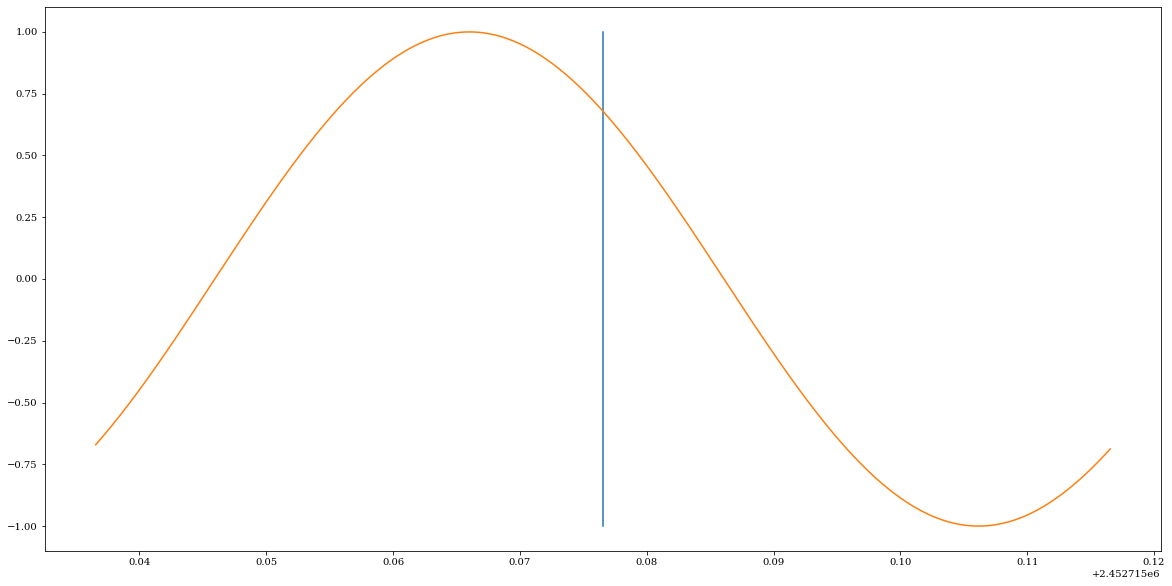

In [20]:
# global model
T0 = 2452715.076546 # corresponds to phase = 0.75
points = np.linspace(T0 - 0.04, T0+0.04, 1000)
y = np.sin((points)*(2*np.pi/0.08029819602313709)+0.203464*2*np.pi)
plt.figure(figsize=(20,10))
plt.plot([T0,T0],[-1,1])
plt.plot(points,y)

In [17]:
1/0.08029845458076104

12.453539800000001

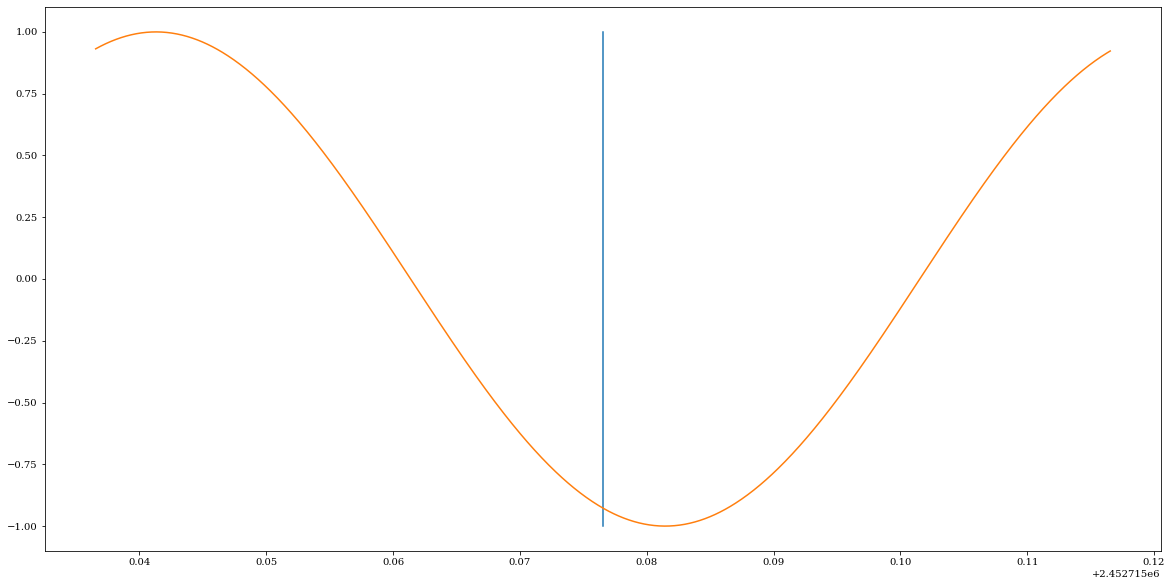

In [21]:


# global model
T0 = 2452715.076546 # corresponds to phase = 0.75
points = np.linspace(T0 - 0.04, T0+0.04, 1000)
y = np.sin((points)*(2*np.pi*12.4535398)+0.865061*2*np.pi)
plt.figure(figsize=(20,10))
plt.plot([T0,T0],[-1,1])
plt.plot(points,y)

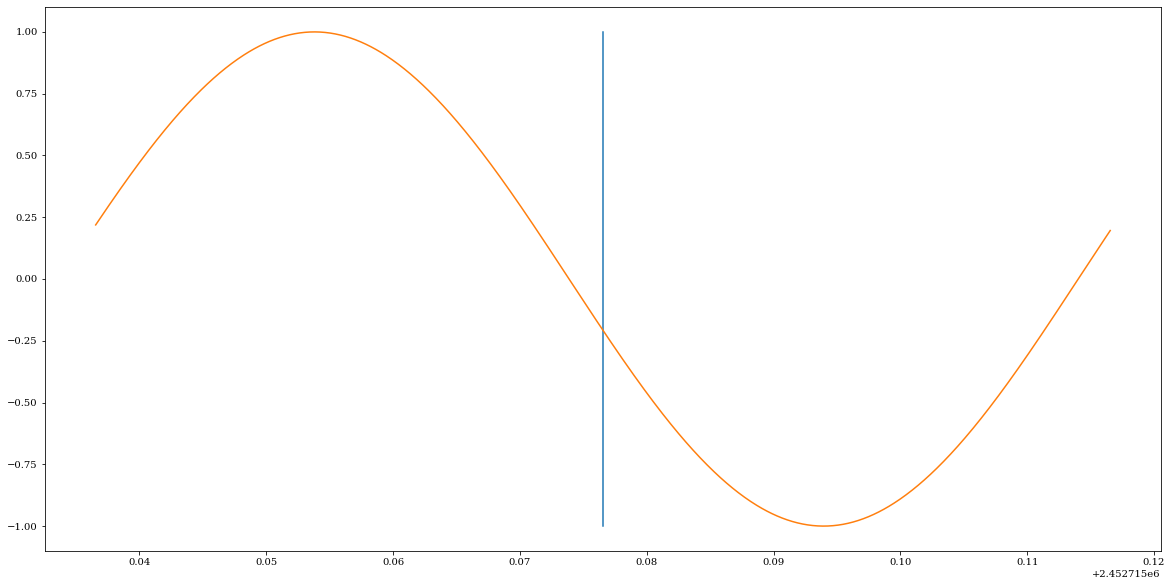

In [28]:


# global model
T0 = 2452715.076546 # corresponds to phase = 0.75
points = np.linspace(T0 - 0.04, T0+0.04, 1000)
y = np.sin((points)*(2*np.pi*12.4535695)+0.86381*2*np.pi)
plt.figure(figsize=(20,10))
plt.plot([T0,T0],[-1,1])
plt.plot(points,y)

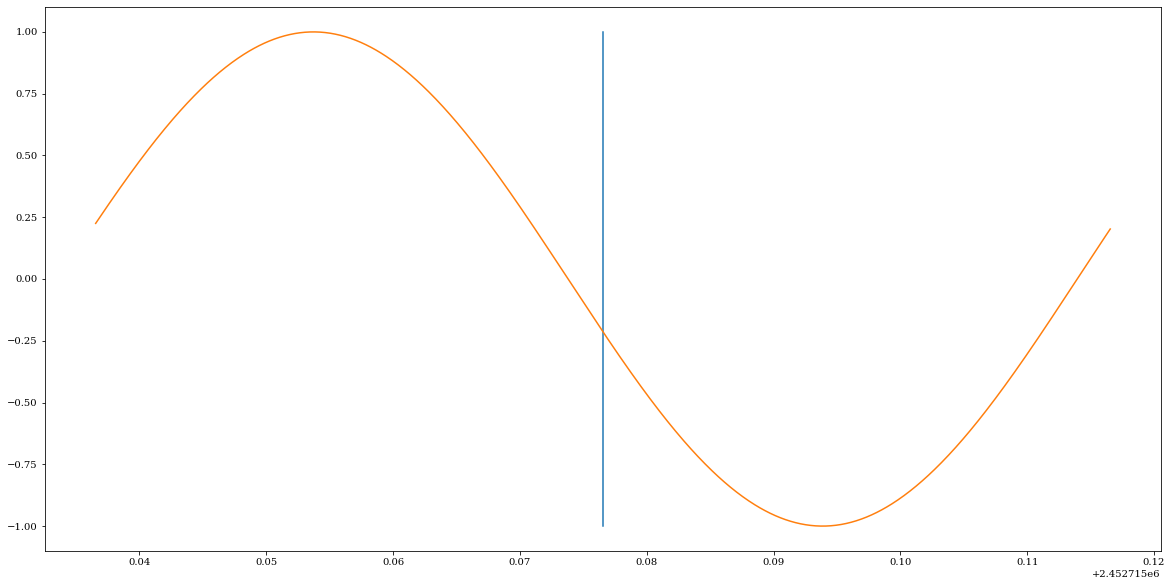

In [8]:


# global model
T0 = 2452715.076546 # corresponds to phase = 0.75
points = np.linspace(T0 - 0.04, T0+0.04, 1000)
y = np.sin((points)*(2*np.pi*12.4535695)+0.864816*2*np.pi)
plt.figure(figsize=(20,10))
plt.plot([T0,T0],[-1,1])
plt.plot(points,y)

In [3]:
indata = np.loadtxt("bestPeriod/globalModel/JJDataPer.dat", usecols=(0,1))
wavelength1 = indata[:,0]
intensity1 = indata[:,1]


indata = np.loadtxt("bestPeriod/globalModel/LT1.dat", usecols=(0,1))
wavelength2 = indata[:,0]
intensity2 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/LT2.dat", usecols=(0,1))
wavelength3 = indata[:,0]
intensity3 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/LT3.dat", usecols=(0,1))
wavelength4 = indata[:,0]
intensity4 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/LT4.dat", usecols=(0,1))
wavelength5 = indata[:,0]
intensity5 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/LT5.dat", usecols=(0,1))
wavelength6 = indata[:,0]
intensity6 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/LT6.dat", usecols=(0,1))
wavelength7 = indata[:,0]
intensity7 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/LT7.dat", usecols=(0,1))
wavelength8 = indata[:,0]
intensity8 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/TESS.dat", usecols=(0,1))
wavelength9 = indata[:,0]
intensity9 = indata[:,1]

indata = np.loadtxt("bestPeriod/globalModel/ZTFGreen.dat", usecols=(0,1))
wavelength10 = indata[:,0]
intensity10 = indata[:,1]

In [4]:
wavelength = np.append(wavelength1, wavelength2)
wavelength = np.append(wavelength, wavelength3)
wavelength = np.append(wavelength, wavelength4)
wavelength = np.append(wavelength, wavelength5)
wavelength = np.append(wavelength, wavelength6)
wavelength = np.append(wavelength, wavelength7)
wavelength = np.append(wavelength, wavelength8)
wavelength = np.append(wavelength, wavelength9)
wavelength = np.append(wavelength, wavelength10)


intensity = np.append(intensity1,intensity2)
intensity = np.append(intensity,intensity3)
intensity = np.append(intensity,intensity4)
intensity = np.append(intensity,intensity5)
intensity = np.append(intensity,intensity6)
intensity = np.append(intensity,intensity7)
intensity = np.append(intensity,intensity8)
intensity = np.append(intensity,intensity9)
intensity = np.append(intensity,intensity10)

40


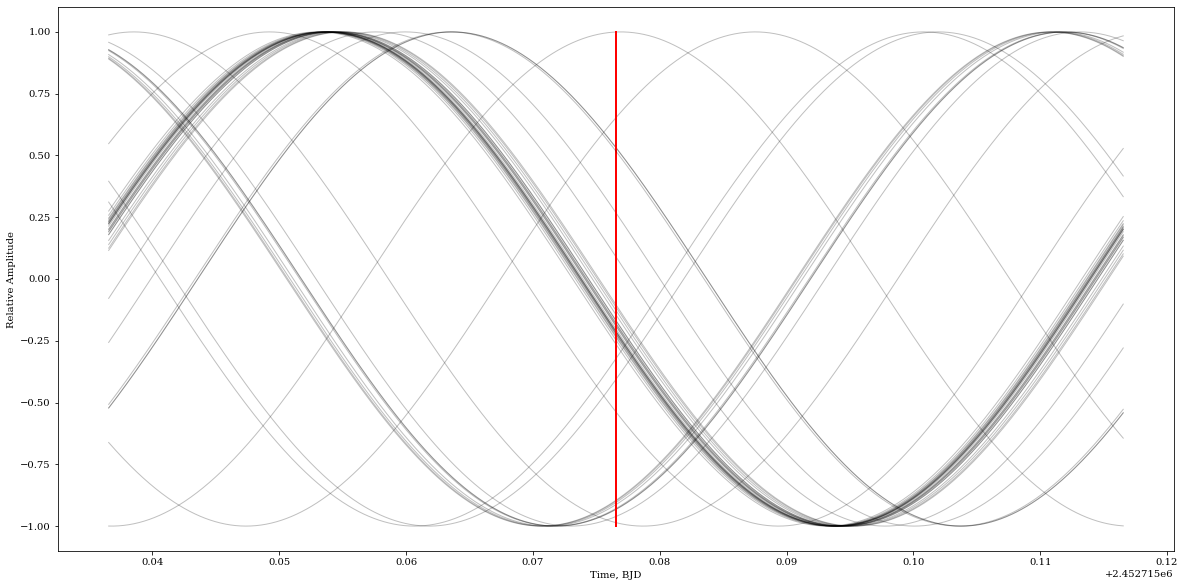

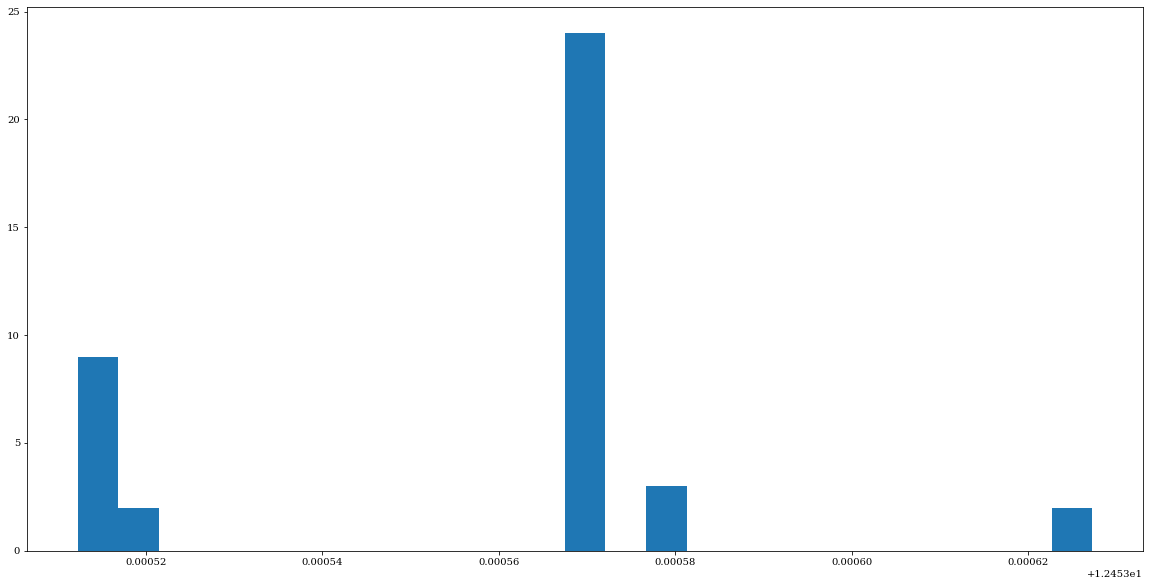

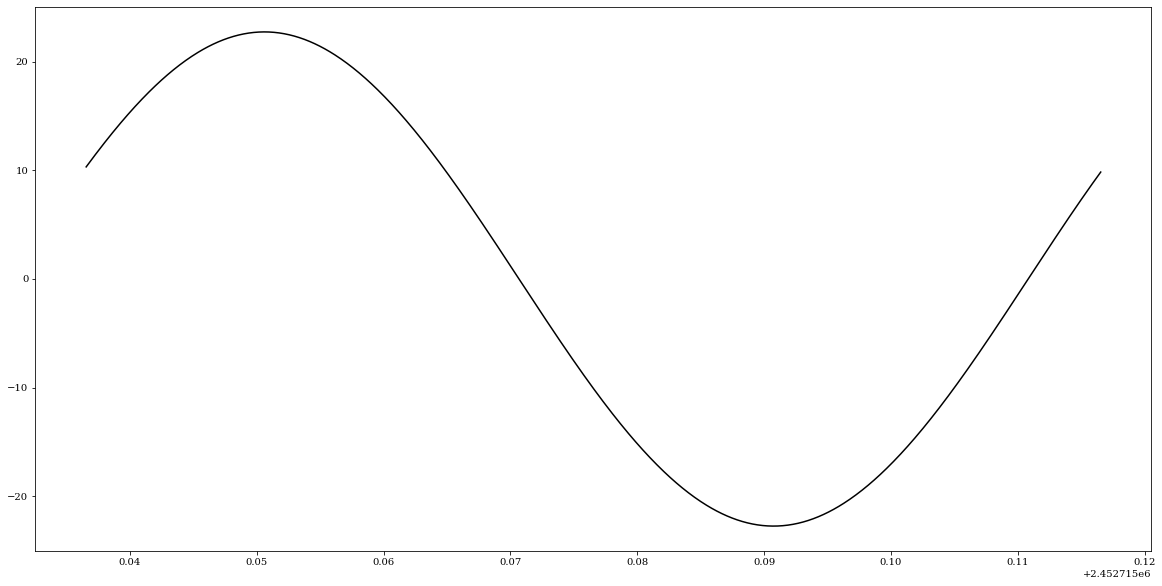

In [7]:

random = np.random.randint(0,91106, size=86550)

random = np.sort(random)
dat = np.vstack((wavelength[random], intensity[random]))
dat = dat.T
cumulativeY = np.zeros(1000)
np.savetxt('bestPeriod/95Sample.dat', dat, delimiter = '\t')
freqL = [12.4535695,12.4535695,12.4535176,12.4535202,12.4535130,12.4535695,12.4535701,12.4535695,12.4535123,12.4535123,12.4535695,
        12.4535774,12.4535775,12.4535695,12.4535695,12.4536267,12.4535695,12.4535123,12.4535695,12.4535695,
        12.4535695,12.4535695,12.4535774,12.4535695,12.4535695,12.4535123,12.4535695,12.4535695,12.4535123,
        12.4535695,12.4535695,12.4535695,12.4535695,12.4535123,12.4536273,12.4535123,12.4535701,
        12.4535695,12.4535123,12.4535701]
phaseL = [0.870259,0.864354,0.349795,0.182801,0.856704,0.857369,0.269625,0.848613,0.434893,0.448021,0.867589,
         0.410919,0.299218,0.85749,0.868378,0.28051,0.865472,0.434642,0.863024,0.86113,
         0.866148,0.860625,0.439748,0.866403,0.847135,0.445923,0.859599,0.853637,0.420335,
          0.873029,0.864596,0.864774,0.850953,0.449208,0.676822,0.44267,0.269708,
         0.859173,0.436342,0.27237]
plt.figure(figsize=(20,10))
print(len(phaseL))
for i in range(len(phaseL)):
    
    plt.plot([T0,T0],[-1,1],c='r')
    points = np.linspace(T0 - 0.04, T0+0.04, 1000)
    y = np.sin((points)*(2*np.pi*freqL[i])+phaseL[i]*2*np.pi)
    plt.plot(points,y,c='k',alpha=0.25,lw=1.0)
    cumulativeY = cumulativeY + y
plt.savefig('BootstrappedModels.pdf')
plt.xlabel('Time, BJD')
plt.ylabel('Relative Amplitude')
plt.figure(figsize=(20,10))
plt.hist(freqL,bins=25)

plt.figure(figsize=(20,10))
plt.plot(points,cumulativeY,c='k')

In [13]:
91106*0.95

86550.7

12.453560935609357


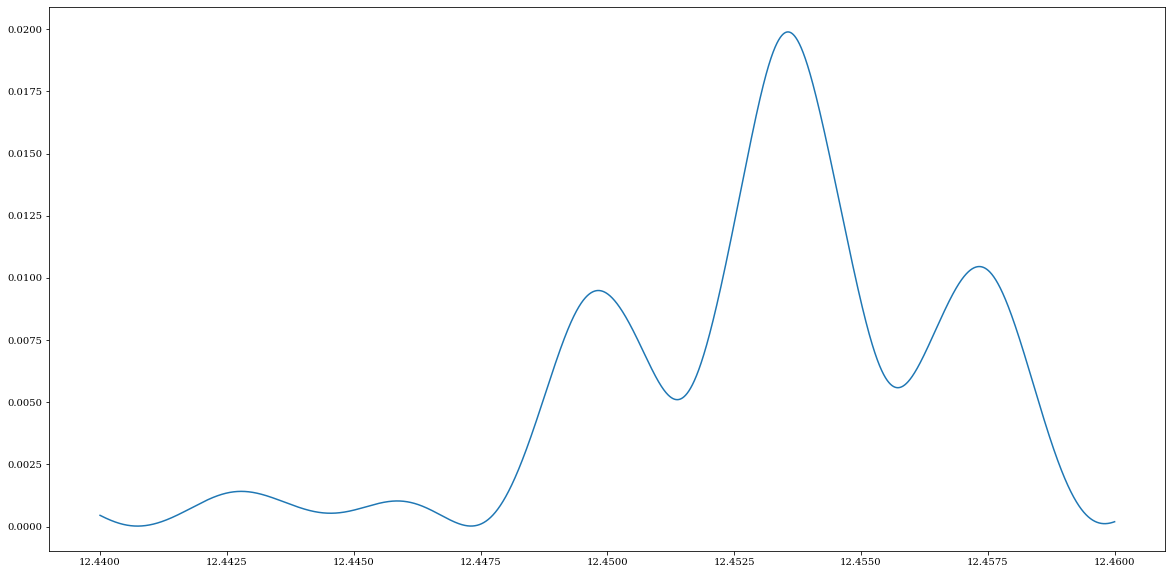

In [29]:
freq = np.linspace(12.44,12.46,100000)
powerPl = LombScargle(wavelength,intensity).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,powerPl)
print(freq[np.argmax(powerPl)])

In [50]:
def sineFitLevenbergMarquardtGen(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 100000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return 0.983356953*np.sin(time*(2*np.pi*freq[np.argmax(powerPl)])+phase)
        x0 = 0
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestPhases.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.983356953)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD

phaseEst, _, _ = sineFitLevenbergMarquardtGen(wavelength, intensity,1)


def sineFitLevenbergMarquardtZTFAmp(time, flux, Nslices):
    bestAmps = []
    timeMean = []
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, thisamp):
            return thisamp*np.sin(time*(2*np.pi*freq[np.argmax(powerPl)])+phaseEst)
        x0 = 0.983356953
        def residuals(thisamp, flux, time):
            return flux - model(time, thisamp)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestAmps.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        
    return bestAmps, timeMean

ampUp,_ = sineFitLevenbergMarquardtZTFAmp(wavelength, intensity,1)


def sineFitLevenbergMarquardtGen(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 100000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return ampUp*np.sin(time*(2*np.pi*freq[np.argmax(powerPl)])+phase)
        x0 = 0
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestPhases.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/ampUp)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD

sineFitLevenbergMarquardtGen(wavelength, intensity,1)

([0.29448872769577283], [2458944.2434587097], [array([0.02542863])])

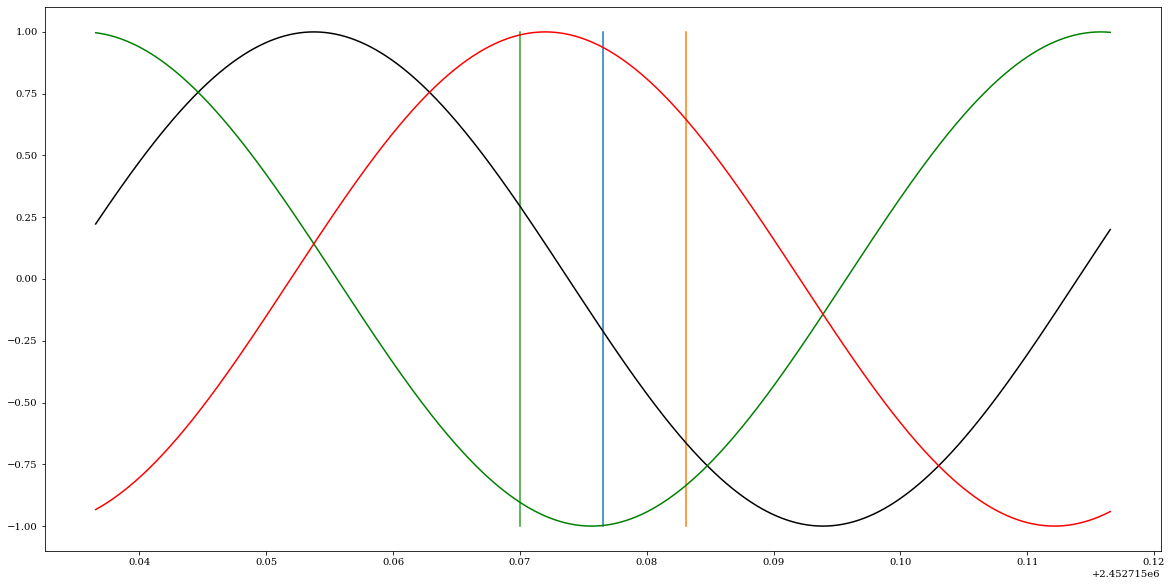

In [6]:

uncert = 1.477025782*(10**(-5))
# global model
T0 = 2452715.076546 # corresponds to phase = 0.75
points = np.linspace(T0 - 0.04, T0+0.04, 1000)
y = np.sin((points)*(2*np.pi*12.4535695)+0.864454*2*np.pi)
y1 = np.sin((points)*(2*np.pi*(12.4535695+uncert))+0.864454*2*np.pi)
y2 = np.sin((points)*(2*np.pi*(12.4535695-uncert))+0.864454*2*np.pi)
plt.figure(figsize=(20,10))
plt.plot([T0,T0],[-1,1])
plt.plot([T0+0.006523143265069504,T0+0.006523143265069504],[-1,1])
plt.plot([T0-0.006523143265069504,T0-0.006523143265069504],[-1,1])
plt.plot(points,y,c='k')
plt.plot(points,y1,c='g')
plt.plot(points,y2,c='r')

In [8]:
percentgeErr = uncert/12.4535695

In [14]:
(percentgeErr * (1/12.4535695)*(7000/(1/12.4535695)))

0.008302182337361188